In [7]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from data_collection import import_dataframes

df = import_dataframes()

X = df[["half_mins_passed","heart_rate"]]
y = df['sleep_stage']

model = SVC(kernel='rbf', C=1E6, gamma='auto')
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5, test_size=0.5)
model.fit(X1, y1)

y2_model = model.predict(X2)
accuracy_score(y2, y2_model)


0.7652264445601249

In [13]:
from data_collection import get_heart_rate_data, get_data_from_server, datetime_str_to_object

def get_dataframe(date):
    """Returns the df of time(index), heart_rate, sleep_stage, half_mins_passed"""
    # create pandas dataframe from json, resample 30 seconds and write mean(integer) of heart rates
    df = pd.DataFrame(get_heart_rate_data(date)).set_index('time').resample('30s').mean().fillna(0).astype(int)
    df['sleep_stage'] = np.nan # fill sleep_stages with nan values
    isDetailed = False

    # get sleep data from the data file
    data = get_data_from_server(date, "sleep")
    for sleep in data['sleep']:
        if sleep['type'] == "stages": # get the detailed sleeps as many as there are in 24hrs
            isDetailed = True
            start_time = datetime_str_to_object(sleep['startTime'])# sleep start time
            end_time = datetime_str_to_object(sleep['endTime'])# sleep end time
            for item in sleep['levels']['data']:
                df.loc[datetime_str_to_object(item['dateTime']), 'sleep_stage'] = item['level']
    
    if isDetailed:
        df = df.loc[start_time:end_time,].fillna(method='ffill')
        df['half_mins_passed'] = np.arange(len(df))
    
        return df[['half_mins_passed','heart_rate','sleep_stage']] # correct order
    return [] # return empty list to indicate that there is no detailed sleep

get_dataframe('2019-03-19')

,heart_rate,sleep_stage
time,,
2019-03-19 00:00:00,84,NaN
2019-03-19 00:00:30,91,NaN
2019-03-19 00:01:00,76,NaN
2019-03-19 00:01:30,76,NaN
2019-03-19 00:02:00,75,NaN
2019-03-19 00:02:30,75,NaN
2019-03-19 00:03:00,74,NaN
2019-03-19 00:03:30,76,NaN
2019-03-19 00:04:00,75,NaN


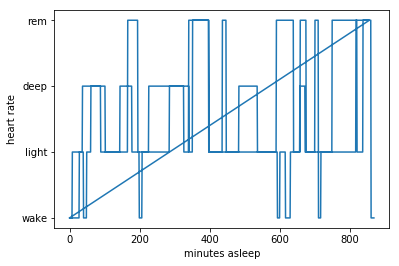

In [14]:
import matplotlib.pyplot as plt

df = import_dataframes()

plt.ylabel('heart rate')
plt.xlabel('minutes asleep')
# plt.plot(df['half_mins_passed'],df['heart_rate'])
plt.plot(df['half_mins_passed'],df['sleep_stage'])


plt.show()